# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Febi Febriyanti Salina Berutu
- **Email:** febifebriyantisb@gmail.com
- **ID Dicoding:** febifebriyantis

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap penggunaan sepeda?
-  Bagaimana rata-rata pengguna sepeda setiap jam pada hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day_data = pd.read_csv("/content/Data/day.csv")
hour_data = pd.read_csv("/content/Data/hour.csv")

In [5]:
#Menggabungkan day_data dan hour_data berdasarkan dteday column
all_data = pd.merge(hour_data, day_data, on='dteday', how='outer', suffixes=('-hourly', '-daily'))

In [6]:
#menghapus column yang memiliki string '-daily' kecuali column cnt-daily
for column in all_data.columns:
  if '-daily' in column and column != 'cnt-daily':
    all_data = all_data.drop([column], axis=1)

In [7]:
#Mengganti '-hourly' pada judul column menjadi ''
for column in all_data.columns:
  if '-hourly' in column:
    all_data = all_data.rename(columns={column: column.replace('-hourly', '')})

In [9]:
all_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt-daily
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,985


### Assessing Data

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
 17  cnt-daily   17379 non-null  int64  
dtypes: float64(4), int64(13), object(1)
memory usage: 2.4+ MB


In [16]:
#Check apakah terdapat null pada data
all_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
cnt-daily     0
dtype: int64

In [18]:
#Check apakah terdapat duplikat pada data
all_data.duplicated().sum()

0

In [17]:
all_data.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt-daily
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,4533.692963
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,22.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,3214.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,4563.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,5986.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,8714.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,1917.376947


### Cleaning Data

In [19]:
#Mengubah tipe data column dteday dari object menjadi date
date_in_day = ["dteday"]

for column in date_in_day:
  all_data[column]=pd.to_datetime(all_data[column])


In [20]:
#Replace nilai data pada kolom yr
all_data.yr.replace({0:2011, 1:2012}, inplace=True)

In [21]:
#Replace nilai data pada kolom season
all_data.season.replace({1:"Springer", 2:"Summer", 3:"Fall", 4:"Winter"}, inplace=True)

In [22]:
#Replace nilai data pada kolom weekday
all_data.weekday.replace({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}, inplace=True)

In [24]:
#Replace nilai data pada kolom weathersit
all_data['weathersit'] = all_data['weathersit'].replace([1,2,3,4], ['clear', 'cloudy', 'light rain', 'heavy rain'])

In [25]:
all_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt-daily
0,1,2011-01-01,Springer,2011,1,0,0,Saturday,0,clear,0.24,0.2879,0.81,0.0,3,13,16,985
1,2,2011-01-01,Springer,2011,1,1,0,Saturday,0,clear,0.22,0.2727,0.80,0.0,8,32,40,985
2,3,2011-01-01,Springer,2011,1,2,0,Saturday,0,clear,0.22,0.2727,0.80,0.0,5,27,32,985
3,4,2011-01-01,Springer,2011,1,3,0,Saturday,0,clear,0.24,0.2879,0.75,0.0,3,10,13,985
4,5,2011-01-01,Springer,2011,1,4,0,Saturday,0,clear,0.24,0.2879,0.75,0.0,0,1,1,985


In [ ]:
#download file.csv yang telah dibersihkan
all_data.to_csv('cleaned_data.csv', index=False)
from google.colab import files
files.download('cleaned_data.csv')

## Exploratory Data Analysis (EDA)

### Explore ...

In [27]:
#Melihat 5 sample data secara acak
all_data.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt-daily
15475,15476,2012-10-12,Winter,2012,10,0,0,Friday,1,clear,0.40,0.4091,0.66,0.1045,8,60,68,7282
12316,12317,2012-06-02,Summer,2012,6,9,0,Saturday,0,clear,0.56,0.5303,0.60,0.2537,89,243,332,8120
918,919,2011-02-10,Springer,2011,2,19,0,Thursday,1,clear,0.14,0.1667,0.28,0.1045,2,110,112,1538
17101,17102,2012-12-20,Winter,2012,12,8,0,Thursday,1,cloudy,0.30,0.3333,0.70,0.0000,14,585,599,4128
10318,10319,2012-03-11,Springer,2012,3,0,0,Sunday,0,clear,0.26,0.2879,0.44,0.0896,7,62,69,4911


In [28]:
# Rata-rata pengguna sepeda each hour diurutkan dari yang paling besar
mean_users_hourly= all_data.groupby('hr')['cnt'].mean().sort_values(ascending=False)
mean_users_hourly

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt, dtype: float64

In [29]:
# Rata-rata pengguna sepeda each day diurutkan dari yang paling besar
mean_users_daily= all_data.groupby('weekday')['cnt'].mean().sort_values(ascending=False)
mean_users_daily

weekday
Thursday     196.436665
Friday       196.135907
Tuesday      191.238891
Wednesday    191.130505
Saturday     190.209793
Monday       183.744655
Sunday       177.468825
Name: cnt, dtype: float64

In [30]:
# Rata-rata pengguna sepeda each month and year diurutkan dari yang paling besar
mean_users_monthly= all_data.groupby(['yr', 'mnth'])['cnt'].mean()
mean_users_monthly

yr    mnth
2011  1        55.507267
      2        74.291217
      3        87.732877
      4       131.947149
      5       182.555108
      6       199.322222
      7       189.974462
      8       186.991792
      9       177.709902
      10      166.232840
      11      142.095967
      12      117.844804
2012  1       130.558704
      2       149.041908
      3       221.904441
      4       242.651811
      5       263.259409
      6       281.708333
      7       273.665323
      8       288.310484
      9       303.573611
      10      280.848870
      11      212.623955
      12      166.729111
Name: cnt, dtype: float64

In [31]:
#mengetahui rata-rata pengguna sepeda each season
mean_users_bySeason = all_data.groupby(['season'])['cnt'].mean().sort_values(ascending=False)
mean_users_bySeason

season
Fall        236.016237
Summer      208.344069
Winter      198.868856
Springer    111.114569
Name: cnt, dtype: float64

In [32]:
#mengetahui 5 waktu (jam) dengan users terbanyak total_users_byHr
total_users_byHr = all_data.groupby(['workingday','hr'])['cnt'].sum().reset_index().sort_values(by='cnt', ascending=False) #mengetahui 5 waktu (jam) dengan users terbanyak
top_hours_workingday = total_users_byHr[total_users_byHr['workingday'] == 1].nlargest(5, 'cnt')
top_hours_weekend = total_users_byHr[total_users_byHr['workingday'] == 0].nlargest(5, 'cnt')

# Menampilkan keduanya
print("Top 5 Hours on Working Days:")
display(top_hours_workingday)

print("Top 5 Hours on Weekends:")
display(top_hours_weekend)

Top 5 Hours on Working Days:


,workingday,hr,cnt
41,1,17,262120
42,1,18,245129
32,1,8,236595
43,1,19,173504
40,1,16,146268


Top 5 Hours on Weekends:


,workingday,hr,cnt
13,0,13,86101
12,0,12,84606
14,0,14,84233
15,0,15,82886
16,0,16,81480


In [36]:
#mengetahui rata-rata casual dan registered user ketika hari libur atau tidak
mean_users_byHoliday = all_data.groupby('holiday')[['casual', 'registered']].mean().sort_values(by='registered', ascending=False)
mean_users_byHoliday

,casual,registered
holiday,,
0,35.408377,155.020203
1,44.718000,112.152000


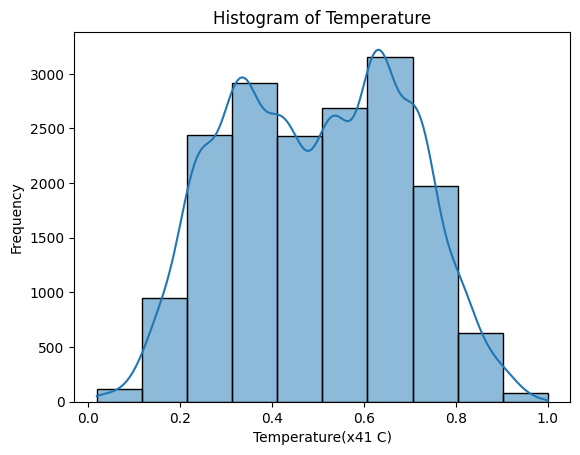

In [37]:
histogram_byTemp = sns.histplot(all_data['temp'], bins=10, kde=True)
plt.xlabel('Temperature(x41 C)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap total penggunaan sepeda setiap tahun?

In [38]:
data_2011 = all_data[all_data['yr'] == 2011]
data_2012 = all_data[all_data['yr'] == 2012]

In [39]:
mean_users_2011 = data_2011.groupby('season')['cnt'].mean().reset_index()
mean_users_2012 = data_2012.groupby('season')['cnt'].mean().reset_index()

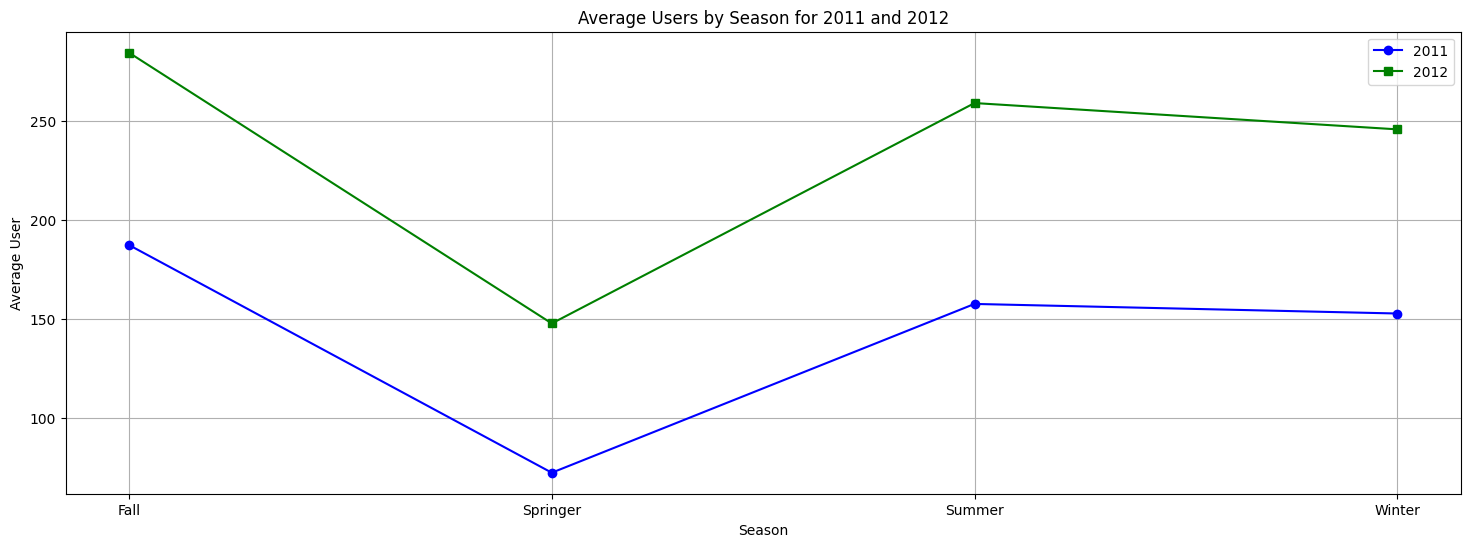

In [48]:
# Membuat line chart
plt.figure(figsize=(18, 6))

# Line chart untuk tahun 2011
plt.plot(mean_users_2011['season'], mean_users_2011['cnt'], marker='o', label='2011', color='blue')

# Line chart untuk tahun 2012
plt.plot(mean_users_2012['season'], mean_users_2012['cnt'], marker='s', label='2012', color='green')

# Menambahkan label dan judul
plt.xlabel('Season')
plt.ylabel('Average User')
plt.title('Average Users by Season for 2011 and 2012')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

### Pertanyaan 2: Bagaimana rata-rata pengguna sepeda setiap jam pada hari kerja dan akhir pekan?

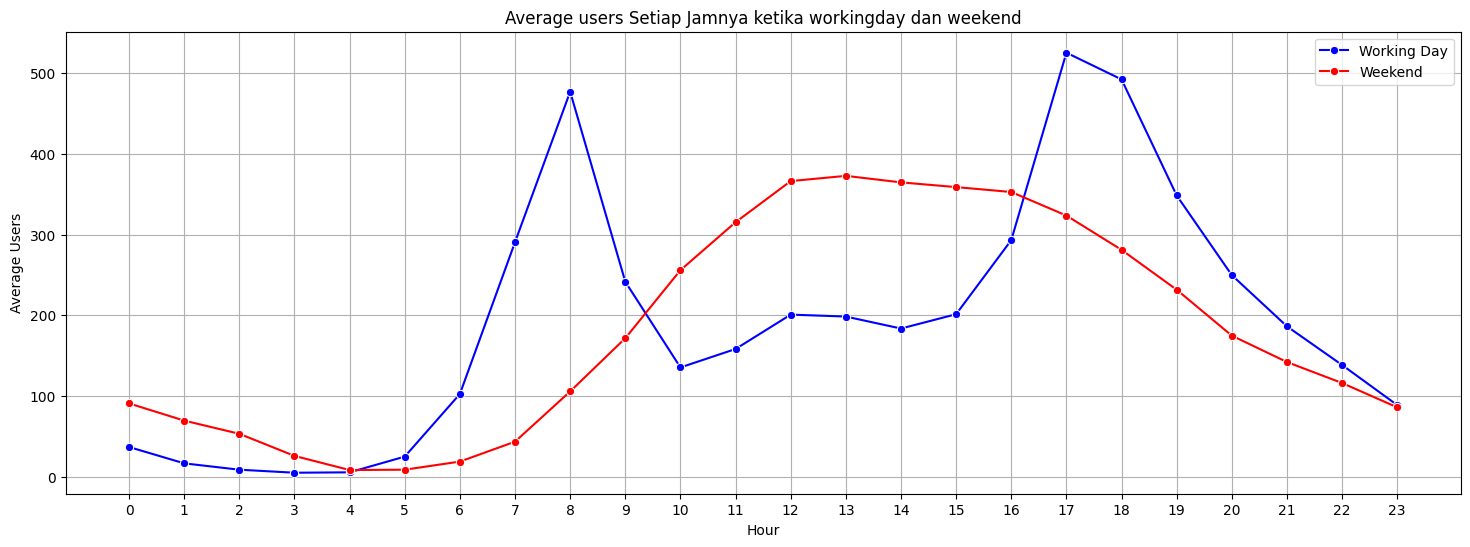

In [49]:
data_workingday = all_data[all_data['workingday'] == 1]
data_weekend = all_data[all_data['workingday'] == 0]

# Membuat dataframe rata-rata peminjaman sepeda setiap jamnya
mean_workingday = data_workingday.groupby('hr')['cnt'].mean().reset_index()
mean_weekend = data_weekend.groupby('hr')['cnt'].mean().reset_index()

# Membuat plot dengan jenis line chart
plt.figure(figsize = (18,6))
ax = sns.lineplot(data=mean_workingday, x="hr", y="cnt", color='blue', errorbar=None, marker="o",label="Working Day")
ay = sns.lineplot(data=mean_weekend, x="hr", y="cnt", color='red', errorbar=None, marker="o",label="Weekend")

# Memberi judul, label, serta ticks
plt.xlabel("Hour")
plt.ylabel("Average Users")
plt.title("Average users Setiap Jamnya ketika workingday dan weekend")
plt.xticks([i for i in range(24)])

# Menerapkan grid pada plot
plt.grid()

plt.show()

## Conclusion

- Conclution pertanyaan 1:

Grafik visualisasi 1 menunjukkan bahwa terjadi kenaikan rata-rata pengguna dari tahun 2011 sampai tahun 2012. Diketahui bahwa setiap tahun, rata-rata pengguna terbanyak terjadi pada musim gugur (fall) dan rata-rata pengguna tersedikit pada musim semi. Ini menandakan bahwa ketika musim gugur disarankan untuk menyediakan lebih banyak sepeda dan musim semi dapat dijadikan waktu untuk perbaikan beberapa sepeda karena jumlah penggunaan sepeda hanya sedikit.

- Conclution pertanyaan 2:

Grafik visualisasi 2 menunjukkan perbandingan rata-rata pengguna sepeda setiap jam di hari kerja dan weekend. Pada working day, rata-rata sepeda banyak digunakan pada jam pergi kantor sekitar jam 8 dan jam pulang kantor sekitar jam 17.00-19.00. Sebaliknya, pada weekend, rata-rata sepeda banyak digunakan pada siang-sore hari, yaitu sekitar jam 12.00-16.00.